# Multimodal Data Fusion - Project Work: Multi-Modal Physical Exercise Classification


In this project, real multi-modal data is studied by utilizing different techniques presented during the course. In addition, there is an optional task to try some different approaches to identify persons from the same dataset. Open MEx dataset from UCI machine learning repository is used. Idea is to apply different techniques to recognize physical exercises from wearable sensors and depth camera, user-independently.

## Author(s)
Add your information here

Name and number: <br/>
<strong>Hadi Mir</strong>, <strong>2703790</strong> 

<strong>Khanh Nguyễn</strong>, <strong>2700683</strong>
 

## Description 

The goal of this project is to develop user-independent pre-processing and classification models to recognize 7 different physical exercises measured by accelerometer (attached to subject's thigh) and depth camera (above the subject facing downwards recording an aerial view). All the exercises were performed subject lying down on the mat. Original dataset have also another acceleration sensor and pressure-sensitive mat, but those two modalities are ommited in this project. There are totally 30 subjects in the original dataset, and in this work subset of 10 person is utilized. Detailed description of the dataset and original data can be access in [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#). We are providing the subset of dataset in Moodle.

The project work is divided on following phases:

1. Data preparation, exploration, and visualization
2. Feature extraction and unimodal fusion for classification
3. Feature extraction and feature-level fusion for multimodal classification
4. Decision-level fusion for multimodal classification
5. Bonus task: Multimodal biometric identification of persons

where 1-4 are compulsory (max. 10 points each), and 5 is optional to get bonus points (max. 5+5 points). In each phase, you should visualize and analyse the results and document the work and findings properly by text blocks and figures between the code. <b> Nice looking </b> and <b> informative </b> notebook representing your results and analysis will be part of the grading in addition to actual implementation.

The results are validated using confusion matrices and F1 scores. F1 macro score is given as 
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of classes.
<br>

## Learning goals 

After the project work, you should  

- be able to study real world multi-modal data
- be able to apply different data fusion techniques to real-world problem
- be able to evaluate the results
- be able to analyse the outcome
- be able to document your work properly

## Relevant lectures

Lectures 1-8

## Relevant exercises

Exercises 0-6

## Relevant chapters in course book

Chapter 1-14

## Additional Material 

* Original dataset [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#)
* Related scientific article [MEx: Multi-modal Exercises Dataset for Human Activity Recognition](https://arxiv.org/pdf/1908.08992.pdf)

# **1. Data preparation, exploration, and visualization**

<a id='task1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 1.</b>

Download data from the Moodle's Project section. Get yourself familiar with the folder structure and data. You can read the data files using the function given below. Each file consists one exercise type performed by single user. Data are divided on multiple folders. Note that, in each folder there is one long sequence of single exercise, except exercise 4 which is performed two times in different ways. Those two sequences belongs to same class. Do the following subtasks to pre-analyse data examples and to prepare the training and testing data for next tasks:
<br>
<br> 
<p> <b>1.1</b> Read raw data from the files. Prepare and divide each data file to shorter sequences using windowing method. Similar to related article "MEx: Multi-modal Exercises Dataset for Human Activity Recognition", use 5 second window and 3 second overlapping between windows, producing several example sequences from one exercise file for classification purposes. Windowing is working so that starting from the beginning of each long exercise sequence, take 5 seconds of data points (from synchronized acceleration data and depth images) based on the time stamps. Next, move the window 2 seconds forward and take another 5 seconds of data. Then continue this until your are at the end of sequence. Each window will consists 500x3 matrix of acceleration data and 5x192 matrix of depth image data.</p>
<br>  
<p> <b>1.2</b> Plot few examples of prepared data for each modalities (accelometer and depth camera). Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image. Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6. Take the first windowed example from the long exercise sequence. </p>
<br>
<p> <b>1.3</b> Split the prepared dataset to training and testing datasets so that data of persons 1-7 are used for training and data of persons 8-10 are used for testing. In next tasks, training dataset could be further divided on (multiple) validation data folds to tune the models parameters, when needed.<br>
<br> 
Document your work, calculate the indicator statistics of training and testing datasets (number of examples, dimensions of each example) and visualize prepared examples.

</div>

### **Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir,getcwd

%matplotlib inline

*In the above cell we are importing python packages that will help us to carry out our task please note that we will require more packages and they are imported in the other tasks*

### **File reading**

In [2]:
def read_data_from_folders(folder_name, ID, outputform):

    # reads the data from folders.

    #Parameters:
    #    folder_name : name of the folder to be read
    #    ID : folder ids
    #    outputform : output data form

    #Returns:
    #    output : data read from folders 


    output = np.empty(outputform, dtype=object)
    
    for n in range(len(ID)):
        #check files in folder.
        currentDir = getcwd()
        filepath = "%s/%s/%02d" %(currentDir, "MEx/" + folder_name, ID[n])
        files = sorted(listdir(filepath))
        count = 0
        
        for f in files:
            file = filepath + "/" + f
            data = pd.read_csv(file, delimiter=',', header=None)
            output[n,count] = data 
            count += 1
            
    return output

folders = ['act', 'dc_0.05_0.05']

allData = []
num = 0
ids = np.arange(1,11)

for fol in folders:
    allData.append(read_data_from_folders(fol, ids, (10,8)))

*The above code was already given. This code is used to read the data from the files*

### **1.1 Reading Data**

*In the below cell we have defined a custom window function that loops over the folders and files and samples them as 5 second window and 3 second overlapping between windows moreover we have structured our data in a way that will make us easy to split it between train and test data and also help us to visualize any persons any exercise easily here is the structure of our data after windowing*

*Further more, we realized that in each exercise folder, exercise 4 is slited into 2 part. Therefore this function also combine those windows below these files into one and marked them under exercise_4*

In [3]:
act_data = read_data_from_folders('act', ids, (10,8))
dc_data = read_data_from_folders('dc_0.05_0.05', ids, (10,8))

 
def window(folder, window_time, overlap_time):

    #Returns the windowed data.

    #Parameters:
    #    folder : folder to be windowed
    #    window_time : window time to take samples
    #    overlap_time : data overlap time

    #Returns:
    #    windowed_data : object containing windowed data for each person and exercise 


    continue_loop = True # variable used for loop termination
    windowed = []
    windowed_data = {}
    noWindow = 0 
    for index, file in enumerate(folder):
        key_1 = f'person_{index +1}' # dynamically generating person keys 
        windowed_data[key_1] = {}
        continue_loop = True
        windowed = [] 
        
        for i, data in enumerate(file): # inside individiual file
            if i < 4:
                key_2 = f'exercise_{i+1}' # dynamically generating exercise keys
                windowed_data[key_1][key_2] = []
            elif i == 4:
                key_2 = f'exercise_{i}'
            else:
                key_2 = f'exercise_{i}'
                windowed_data[key_1][key_2] = []
            continue_loop = True
            start_index = 0
            end_index = 0
            windowed = []
            while continue_loop:
                end_index = start_index + window_time
                if end_index > len(data):
                    continue_loop = False
                    break
                win = data.iloc[start_index:end_index, 1:]
                start_index = end_index - overlap_time
                windowed_data[key_1][key_2].append(win)
                noWindow = noWindow + 1               
                
    return windowed_data


*The structured of data we applied window function should be arranged like this:*
---


```
{
  "person_1": {
    "exercise_1: [//contains windowed samples in sub arrays],
    "exercise_2: [[],[],[],...],
    "exercise_3: [[],[],[],...],
    .
    .
    .
  },
    "person_2": {
    "exercise_1: [[],[],[],...],
    "exercise_2: [[],[],[],...],
    "exercise_3: [[],[],[],...],
    .
    .
    .
  },
  .
  .
  .
}
```
---
*We have sampled the data in a way so that each individual sample window of act data is (500, 3) and each individual window of dc data is (5, 192) as specifies in the requirements*




#### **Windowing act data**

In [4]:
act_windowed = window(act_data, 500, 300) # using the above function to window the act data
            
print('The shape of an individual window of act array is' ,np.array(act_windowed['person_1']['exercise_1'][0]).shape)

The shape of an individual window of act array is (500, 3)


#### **Windowing dc data**

In [5]:
dc_windowed = window(dc_data, 5, 3) # using the above function to window the dc data

print('The shape of an individual window of dc array is' ,np.array(dc_windowed['person_1']['exercise_1'][0]).shape)

The shape of an individual window of dc array is (5, 192)


### **1.2 Plotting data**


*First we will display the sampled data of person_1 performing exercise 2, 5 and 6 and then same for person_5 will follow. Please note that in case of act data only 3 windowed samples are plotted*

**act data**

**Person_1 exercse_2**

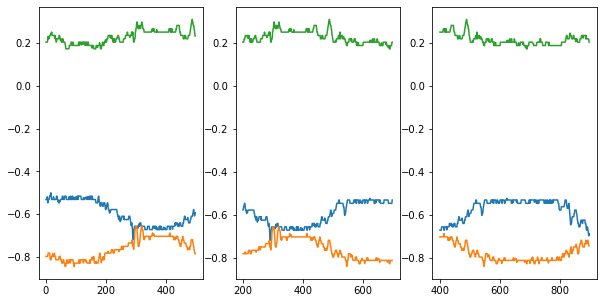

In [6]:
f = plt.figure(figsize=(10,5)) 
f.add_subplot(1,3,1)
plt.plot(act_windowed['person_1']['exercise_2'][0])
f.add_subplot(1,3,2)
plt.plot(act_windowed['person_1']['exercise_2'][1])
f.add_subplot(1,3,3)
plt.plot(act_windowed['person_1']['exercise_2'][2])

**Person_1 exercse_5**

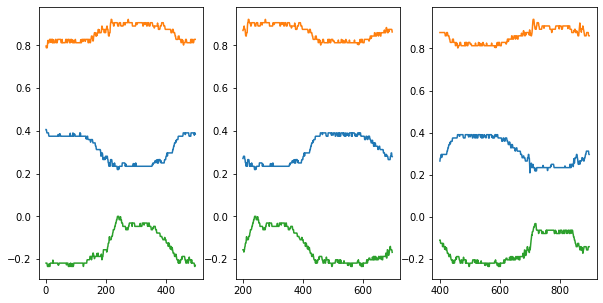

In [7]:
f = plt.figure(figsize=(10,5))
f.add_subplot(1,3,1)
plt.plot(act_windowed['person_1']['exercise_5'][0])
f.add_subplot(1,3,2)
plt.plot(act_windowed['person_1']['exercise_5'][1])
f.add_subplot(1,3,3)
plt.plot(act_windowed['person_1']['exercise_5'][2])

**Person_1 exercse_6**

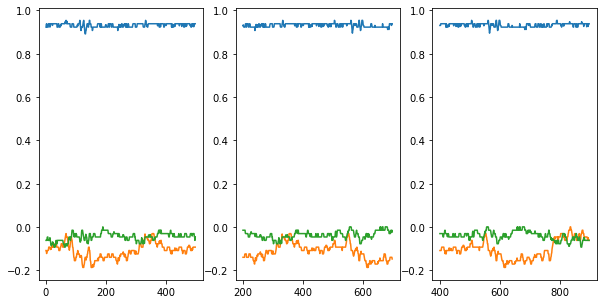

In [8]:
f = plt.figure(figsize=(10,5))
f.add_subplot(1,3,1)
plt.plot(act_windowed['person_1']['exercise_6'][0])
f.add_subplot(1,3,2)
plt.plot(act_windowed['person_1']['exercise_6'][1])
f.add_subplot(1,3,3)
plt.plot(act_windowed['person_1']['exercise_6'][2])

**Person_5 exercise_2**

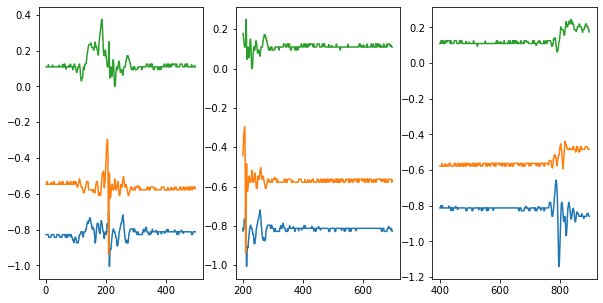

In [9]:
f = plt.figure(figsize=(10,5))
f.add_subplot(1,3,1)
plt.plot(act_windowed['person_5']['exercise_2'][0])
f.add_subplot(1,3,2)
plt.plot(act_windowed['person_5']['exercise_2'][1])
f.add_subplot(1,3,3)
plt.plot(act_windowed['person_5']['exercise_2'][2])

**Person_5 exercise_5**

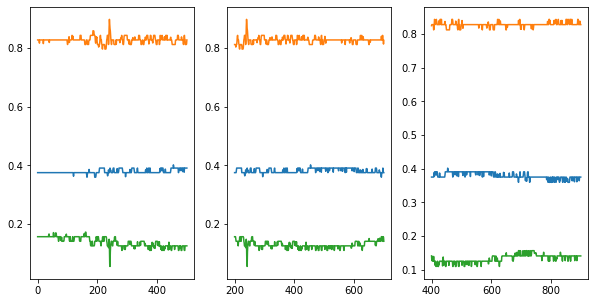

In [10]:
f = plt.figure(figsize=(10,5))
f.add_subplot(1,3,1)
plt.plot(act_windowed['person_5']['exercise_5'][0])
f.add_subplot(1,3,2)
plt.plot(act_windowed['person_5']['exercise_5'][1])
f.add_subplot(1,3,3)
plt.plot(act_windowed['person_5']['exercise_5'][2])

**Person_5 exercise_6**

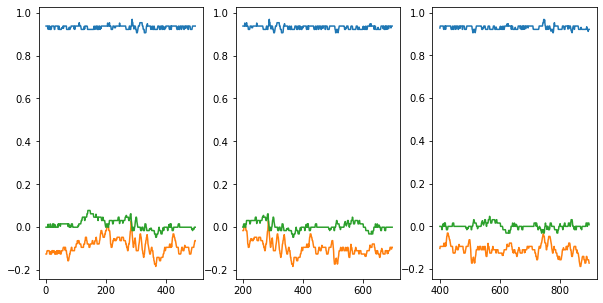

In [11]:
f = plt.figure(figsize=(10,5))
f.add_subplot(1,3,1)
plt.plot(act_windowed['person_5']['exercise_6'][0])
f.add_subplot(1,3,2)
plt.plot(act_windowed['person_5']['exercise_6'][1])
f.add_subplot(1,3,3)
plt.plot(act_windowed['person_5']['exercise_6'][2])

*It can be seen from the plots that the data is nicely windowed*

*Now we will plot some examples of dc data*

**dc data**

**Person_1 exercse_2**

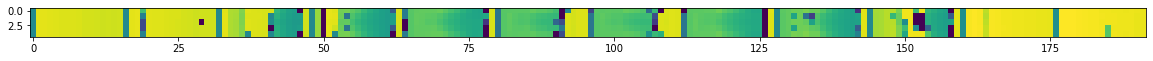

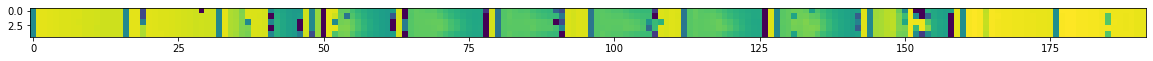

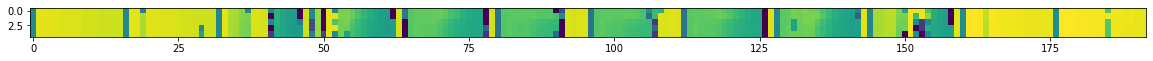

In [12]:
plt.figure(figsize=(20,10))
plt.imshow(dc_windowed['person_1']['exercise_2'][0])
plt.figure(figsize=(20,10))
plt.imshow(dc_windowed['person_1']['exercise_2'][1])
plt.figure(figsize=(20,10))
plt.imshow(dc_windowed['person_1']['exercise_2'][2])

**Person_1 exercse_5**

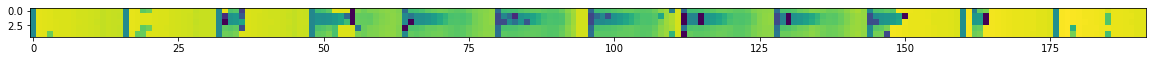

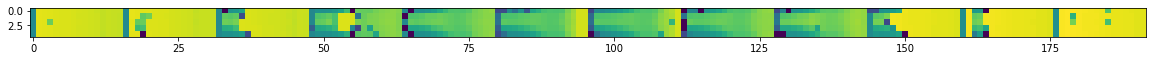

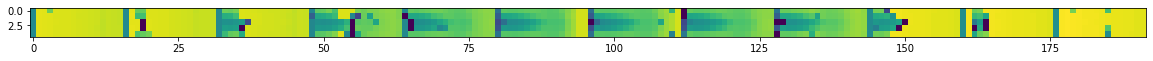

In [13]:
plt.figure(figsize=(20,10))
plt.imshow(dc_windowed['person_1']['exercise_5'][0])
plt.figure(figsize=(20,10))
plt.imshow(dc_windowed['person_1']['exercise_5'][1])
plt.figure(figsize=(20,10))
plt.imshow(dc_windowed['person_1']['exercise_5'][2])

**Person_1 exercise_6**

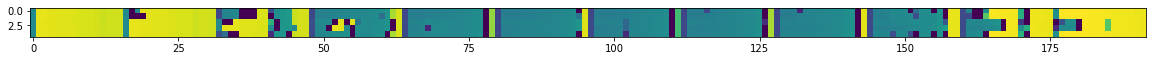

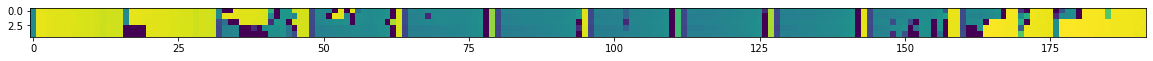

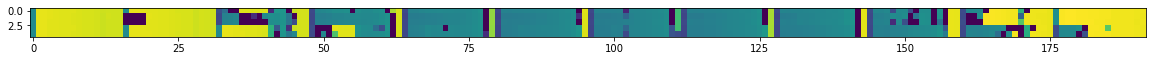

In [14]:
plt.figure(figsize=(20,10))
plt.imshow(dc_windowed['person_1']['exercise_6'][0])
plt.figure(figsize=(20,10))
plt.imshow(dc_windowed['person_1']['exercise_6'][1])
plt.figure(figsize=(20,10))
plt.imshow(dc_windowed['person_1']['exercise_6'][2])

**Person_5 exercise_2**

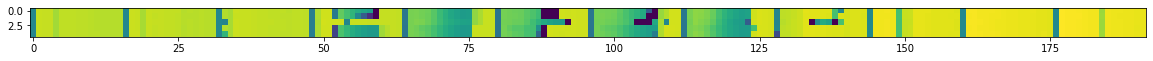

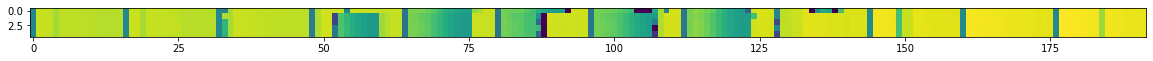

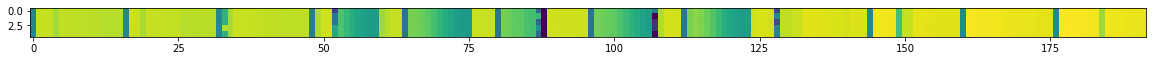

In [15]:
plt.figure(figsize=(20,10))
plt.imshow(dc_windowed['person_5']['exercise_2'][0])
plt.figure(figsize=(20,10))
plt.imshow(dc_windowed['person_5']['exercise_2'][1])
plt.figure(figsize=(20,10))
plt.imshow(dc_windowed['person_5']['exercise_2'][2])

**Person_5 exercise_5**

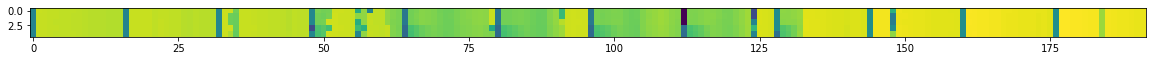

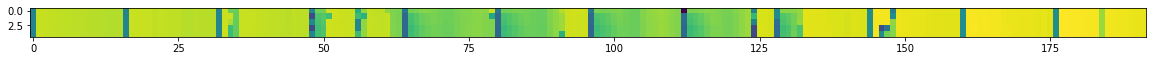

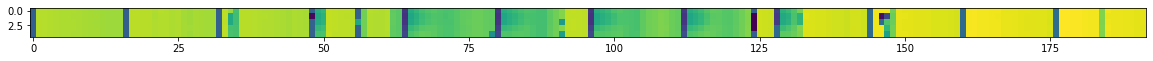

In [16]:
plt.figure(figsize=(20,10))
plt.imshow(dc_windowed['person_5']['exercise_5'][0])
plt.figure(figsize=(20,10))
plt.imshow(dc_windowed['person_5']['exercise_5'][1])
plt.figure(figsize=(20,10))
plt.imshow(dc_windowed['person_5']['exercise_5'][2])

**Person_5 exercise_6**

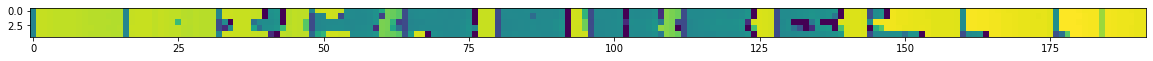

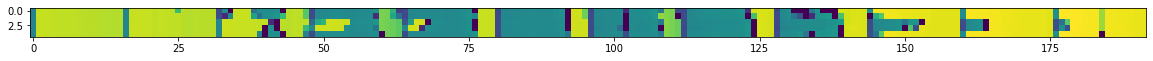

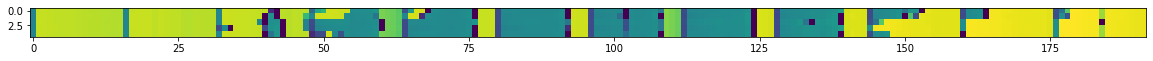

In [17]:
plt.figure(figsize=(20,10))
plt.imshow(dc_windowed['person_5']['exercise_6'][0])
plt.figure(figsize=(20,10))
plt.imshow(dc_windowed['person_5']['exercise_6'][1])
plt.figure(figsize=(20,10))
plt.imshow(dc_windowed['person_5']['exercise_6'][2])

*As stated earlier the way we split our data made it easy for us to plot and visualize the data*.

### **1.3 Split data**



*we will split the dataset into training and testing datasets in such a way that data of persons 1-7 are used for training and data of persons 8-10 are used for testing.*

In [18]:
def train_test_split(data):

    #Returns the splitted data into train and test.

    #Parameters:
    #    data : data to be splitted 

    #Returns:
    #    train_data : object containing training data (person_1 to person_7)
    #    test_data: object containing testing data (person_8 to person_10)
  
    train_data = {}
    test_data = {}
    
    for index, key in enumerate(data):
        if index < 7:
            train_data[key] = data[key]
        else:
            test_data[key] = data[key]

    return train_data, test_data

*We have created a train_test_split function which loops over the data and seperates the data from person 1-7 into training and rest into testing data*

*Splitting act data into train and test data*

In [19]:
act_train_data , act_test_data = train_test_split(act_windowed)

*Splitting dc data into train and test data*

In [20]:
dc_train_data, dc_test_data = train_test_split(dc_windowed)

 
---
---


# **2. Feature extraction and fusion for unimodal classification**

<a id='task2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 2.</b>

Use the training dataset prepared in task 1. to build models based on the combination of principal component analysis (PCA), linear discriminant analysis (LDA), and nearest neighbour (NN) classifier for each modality separately and evaluate the model on test dataset. Do the subtasks given as
<br>
<br>
<p> <b>2.1</b> Calculate PCA and LDA transformations to reduce the dimensionality of accelerometer data (e.g., using scikit-learn implementations). Before transformations downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix of data for each 5 sec window. You should also standardize the values to zero mean and unit variance before the transformations. Using training dataset, fit PCA with 5-dimensional subspace (i.e., choosing the 5 largest principal components) and fit LDA with 5-dimensional subspace. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 3x(5+5). Perform the fusion of PCA and LDA similar manner as presented in Lecture 3 (pages-19-20) using NN method. Evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br>
<p> <b>2.2</b> Use PCA and LDA transformations to reduce the dimensionality of depth images. You should also standardize the values to zero mean and unit variance before the transformations. Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 5x1x(5+5). Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 2.1-2.2.
    
</div>

### **Imports**

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from scipy import signal
from sklearn import metrics

scaler = StandardScaler()

### **Downsampling acceleration data**

In [22]:
def downsample(data_samples):
    
    #Returns the downsampled data.

    #Parameters:
    #    data_samples : data to be downsampled 

    #Returns:
    #    processed_data : downsampled data

  processed_data = {}
  for person in data_samples:
    print(person)
    processed_data[person] = {}
    for key in data_samples[person]: 
      processed_data[person][key] = []
      for i in range(len(data_samples[person][key])):
        pre_processed = signal.resample(data_samples[person][key][i], 125)
        processed_data[person][key].append(pre_processed)
  return processed_data

*The above function is used to downsample the data.*

In [23]:
act_train_data_sampled = downsample(act_train_data)
print('shape of the resampled individual act train data is:', np.array(act_train_data_sampled['person_1']['exercise_1'][0]).shape)

person_1
person_2
person_3
person_4
person_5
person_6
person_7
shape of the resampled individual act train data is: (125, 3)


In [24]:
act_test_data_sampled = downsample(act_test_data)
print('shape of the resampled individual act test data is:', np.array(act_train_data_sampled['person_1']['exercise_1'][0]).shape)

person_8
person_9
person_10
shape of the resampled individual act test data is: (125, 3)


### **Visvualizing processed data**

*Since we have processed our data its good that we take a peak into how it looks now*

**Plotting processed act data**

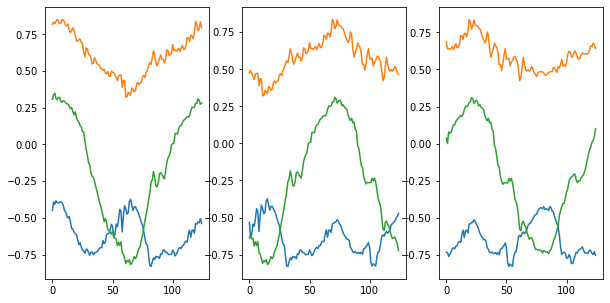

In [25]:
f = plt.figure(figsize=(10,5))
f.add_subplot(1,3,1)
plt.plot(act_test_data_sampled['person_8']['exercise_1'][0])
f.add_subplot(1,3,2)
plt.plot(act_test_data_sampled['person_8']['exercise_1'][1])
f.add_subplot(1,3,3)
plt.plot(act_test_data_sampled['person_8']['exercise_1'][2])

*Well looking at the act data it is pretty clear that our data has been downsampled*

### **Feature extraction and fusion for unimodal classification**

#### **Feature extraction and standardization functions for both modalities**

*We define extract function for act data to get 3 channels separately and similar for dc data to get 5 images from each windows. Number of rows after extraction is number of windows. Because of different recording time, we have diffrent number of windows from 2 data act and dc. In this task, we work on unimodal classification, therefore irrelevant size of data set can be accepted.*

*These functions below also standardize the extracted data. In addition, we also label the target exercise according the windows.*

In [26]:
def act_extract_std(dataIn):

    #Returns the standardized and extracted components of act data.

    #Parameters:
    #    dataIn : act data to be standardized and extracted 

    #Returns:
    #    X_feature: X component 
    #    Y_feature: Y component
    #    Z_feature: Z component
    #    Target: labels or target values

    feature = []
    X_feature = []
    Y_feature = []
    Z_feature = []
    Target = []
    for person in dataIn:
        ex = 0
        for key in dataIn[person]:
            ex = ex+1
            for i in range(len(dataIn[person][key])):
                features_data = dataIn[person][key][i]
                features_data_standardized = scaler.fit_transform(features_data)
                target_col = ex * np.ones((features_data.shape[0],1))
                x = features_data_standardized[:,0]
                y = features_data_standardized[:,1]
                z = features_data_standardized[:,2]
                features_data = np.append(features_data, target_col, axis=1)
                tar = ex
                feature.append(features_data)
                X_feature.append(x)
                Y_feature.append(y)
                Z_feature.append(z)
                Target.append(tar)
    return X_feature,Y_feature,Z_feature,Target



In [27]:
def dc_extract_std(dataIn):

    #Returns the standardized and extracted components of dc data.

    #Parameters:
    #    dataIn : dc data to be standardized and extracted 

    #Returns:
    #    I1: img 1 
    #    I2: img 2
    #    I3: img 3
    #    I4: img 4
    #    I5: img 5
    #    Target: labels or target values

    feature = []
    I1 = []
    I2 = []
    I3 = []
    I4 = []
    I5 = []
    Target = []
    for person in dataIn:
        ex = 0
        for key in dataIn[person]:
            ex = ex+1
            for i in range(len(dataIn[person][key])):
                features_data = np.array(dataIn[person][key][i])
                features_data_standardized = scaler.fit_transform(features_data)
                target_col = ex * np.ones((features_data.shape[0],1))
                image1 = features_data_standardized[0,:]
                image2 = features_data_standardized[1,:]
                image3 = features_data_standardized[2,:]
                image4 = features_data_standardized[3,:]
                image5 = features_data_standardized[4,:]
                features_data = np.append(features_data, target_col, axis=1)
                tar = ex
                feature.append(features_data)
                I1.append(image1)
                I2.append(image2)
                I3.append(image3)
                I4.append(image4)
                I5.append(image5)
                Target.append(tar)
    return I1,I2,I3,I4,I5,Target

### **PCA and LDA**

*Fit 5-dimensional PCA/LDA to train dataset, by resulted components transform train set and test set in order to reduce the dimenson. Since the shape of act and dc data are different we created different transform function for both of them. The above function is used to transform dc data into the shape that can be used to calculate its PCA and LDA. In detail, each window of act data channel is reduced from 125 col to 5 col; each window of dc data image is reduced from 192 col to 5 col.*

In [28]:
def dimReduction_act(data, datatest, target, noComp, return_LDA):

    #Returns the reduced components of act data.

    #Parameters:
    #    data : act data 
    #    datatest : act test data   
    #    target : labes
    #    noComp : number of components 
    #    return_LDA : Boolean to control the return of LDA value 
    
    #Returns:
    #    pca_reduced: PCA of acc train data 
    #    pca_reduced_test: PCA of acc test data 
    #    lda_reduced: LDA of act train data
    #    lda_reduced_test: LDA of act test data

    pca = PCA(n_components = noComp) 
    lda = LinearDiscriminantAnalysis(n_components = noComp)
    pca_reduced = pca.fit_transform(data)
    components = pca.components_ 
    lda_reduced = lda.fit_transform(data, target)
    pca_reduced_test = pca.transform(datatest)
    lda_reduced_test = lda.transform(datatest)
    del pca, lda
    if return_LDA:
        return np.array(pca_reduced), np.array(pca_reduced_test), np.array(lda_reduced), np.array(lda_reduced_test)
    else:
        return np.array(pca_reduced), np.array(pca_reduced_test)

In [29]:
def dimReduction_dc(data, datatest, target, noComp, return_LDA):

    #Returns the reduced components of dc data.

    #Parameters:
    #    data : dc data 
    #    datatest : dc test data   
    #    target : labes
    #    noComp : number of components 
    #    return_LDA : Boolean to control the return of LDA value 
    
    #Returns:
    #    pca_reduced: PCA of acc train data 
    #    pca_reduced_test: PCA of acc test data 
    #    lda_reduced: LDA of dc train data
    #    lda_reduced_test: LDA of dc test data

    pca = PCA(n_components = noComp) 
    lda = LinearDiscriminantAnalysis(n_components = noComp)
    pca_reduced = pca.fit_transform(data)
    components = pca.components_ 
    lda_reduced = lda.fit_transform(data, target)
    pca_reduced_test = pca.transform(datatest)
    lda_reduced_test = lda.transform(datatest)
    del pca, lda
    if return_LDA:
        return np.array(pca_reduced), np.array(pca_reduced_test), np.array(lda_reduced), np.array(lda_reduced_test)
    else:
        return np.array(pca_reduced), np.array(pca_reduced_test)

### **Concatenate vector features**

*We combine the feature vector PCA/LDA according each window. Regarding act data, 1 window has 15 components (5 dimension PCA/LDA x 3 channel X-Y-Z). Besides that, dc data, 1 window has 25 components (5 dimension PCA/LDA x 5 images )*

In [30]:
def concatenate_vector_act(data_pca, data_lda):
   
    #Returns the concatinated acc data.

    #Parameters:
    #    data_pca : act PCA data 
    #    data_lda : act LDA data    
    
    #Returns:
    #    act_PCA: concatinated PCA
    #    act_LDA: concatinated LDA

    x_pca = data_pca[0]
    y_pca = data_pca[1]
    z_pca = data_pca[2]
    
    x_lda = data_lda[0]
    y_lda = data_lda[1]
    z_lda = data_lda[2]
    
    act_PCA_list = []
    act_LDA_list = []
    for iwindow in range(0,len(x_pca)):
        window_dc_concat_pca = np.concatenate((x_pca[iwindow,:], y_pca[iwindow,:], 
                                               z_pca[iwindow,:]), axis=0)
        act_PCA_list.append(window_dc_concat_pca)
        window_dc_concat_lda = np.concatenate((x_lda[iwindow,:], y_lda[iwindow,:], 
                                               z_lda[iwindow,:]), axis=0)
        act_LDA_list.append(window_dc_concat_lda)
    act_PCA = np.array(act_PCA_list)
    act_LDA = np.array(act_LDA_list)
    return act_PCA, act_LDA

In [31]:
def concatenate_vector_dc(data_pca, data_lda):

    #Returns the concatinated dc data.

    #Parameters:
    #    data_pca : dc PCA data 
    #    data_lda : dc LDA data    
    
    #Returns:
    #    dc_PCA: concatinated PCA
    #    dc_LDA: concatinated LDA

    img1_pca = data_pca[0]
    img2_pca = data_pca[1]
    img3_pca = data_pca[2]
    img4_pca = data_pca[3]
    img5_pca = data_pca[4]
    
    img1_lda = data_lda[0]
    img2_lda = data_lda[1]
    img3_lda = data_lda[2]
    img4_lda = data_lda[3]
    img5_lda = data_lda[4]
    
    dc_PCA_list = []
    dc_LDA_list = []
    for iwindow in range(0,len(img1_pca)):
        window_dc_concat_pca = np.concatenate((img1_pca[iwindow,:], img2_pca[iwindow,:], 
                                               img3_pca[iwindow,:], img4_pca[iwindow,:], 
                                               img5_pca[iwindow,:]), axis=0)
        dc_PCA_list.append(window_dc_concat_pca)
        window_dc_concat_lda = np.concatenate((img1_lda[iwindow,:], img2_lda[iwindow,:], 
                                               img3_lda[iwindow,:], img4_lda[iwindow,:], 
                                               img5_lda[iwindow,:]), axis=0)
        dc_LDA_list.append(window_dc_concat_lda)
    dc_PCA = np.array(dc_PCA_list)
    dc_LDA = np.array(dc_LDA_list)
    return dc_PCA, dc_LDA

### **Main Process**

Main proccess to complete requirements of task 2.1 and 2.2 (training and predict exercise from act and dc data). In this part, we call out above prepared function and, fusion PCA and LDA and predict the exercise class of test set.  This process include :

1.   Extract feature and standardized the output
2.   Reduce dimension by PCA and LDA
3. Concatenate sequence from step 2 to a single vector
4. Calculate distance from each window in test set to training set (following instructions from lecture slides). Then calculate the fusion F parameter between PCA and LDA. Base on the smalest value F to predict the exercise class. 

In step 4, we predict manually which window in test set belong to by argmin but **not applying Kneighboursclassifer**.


#### **Working on acceleration data** 

In [32]:
#  Step 1: Extract feature and standardized the output       
X_feature,Y_feature,Z_feature,Target_act = act_extract_std(act_train_data_sampled)
X_feature_test,Y_feature_test,Z_feature_test,Target_test_act = act_extract_std(act_test_data_sampled)

#  Step 2: Reduce dimension by PCA and LDA  
X_reduce_PCA, X_reduce_PCA_test, X_reduce_LDA, X_reduce_LDA_test = dimReduction_act(X_feature, X_feature_test, Target_act, 5, True)
Y_reduce_PCA, Y_reduce_PCA_test, Y_reduce_LDA, Y_reduce_LDA_test = dimReduction_act(Y_feature, Y_feature_test, Target_act, 5, True)
Z_reduce_PCA, Z_reduce_PCA_test, Z_reduce_LDA, Z_reduce_LDA_test = dimReduction_act(Z_feature, Z_feature_test, Target_act, 5, True)



#  Step 3: Concatenate sequence from step 2 to a single vector  
act_PCA, act_LDA = concatenate_vector_act([X_reduce_PCA, Y_reduce_PCA, Z_reduce_PCA],
                                       [X_reduce_LDA, Y_reduce_LDA, Z_reduce_LDA])
act_PCA_test, act_LDA_test = concatenate_vector_act([X_reduce_PCA_test, Y_reduce_PCA_test, Z_reduce_PCA_test],
                                                 [X_reduce_LDA_test, Y_reduce_LDA_test, Z_reduce_LDA_test])



######Step 4: Fuse PCA and LDA then predict excercise class on test set ####
estimation_result_act = []
estimation_result_nn = []
Fusion_F_test = []
for ifu in range(0,len(act_PCA_test)):
    d_PCA_temp = np.sum(np.power((act_PCA_test[ifu,:]-act_PCA), 2), axis=1)
    D_LDA_temp = np.sum(np.power((act_LDA_test[ifu,:]-act_LDA), 2), axis=1)
    min_d_PCA = np.min(d_PCA_temp)
    max_d_PCA = np.max(d_PCA_temp)
    d_PCA_temp_scale = (d_PCA_temp-min_d_PCA)/(max_d_PCA-min_d_PCA)
    
    min_D_LDA = np.min(D_LDA_temp)
    max_D_LDA = np.max(D_LDA_temp)
    D_LDA_temp_scale = (D_LDA_temp-min_D_LDA)/(max_D_LDA-min_D_LDA)
    
    Fusion_F = 1/2*(d_PCA_temp_scale+D_LDA_temp_scale)
    Fusion_F_test.append(Fusion_F)
    index = np.unravel_index(Fusion_F.argmin(), Fusion_F.shape)[0]
    predict_wd = Target_act[index]
    estimation_result_act.append(predict_wd)

#### **Working on depth camera data** 

In [33]:
#  Step 1: Extract feature and standardized the output     
I1,I2,I3,I4,I5,Target_dc = dc_extract_std(dc_train_data)
I1_test,I2_test,I3_test,I4_test,I5_test,Target_dc_test = dc_extract_std(dc_test_data)


# Step 2: Reduce dimension by PCA and LDA   
I1_reduce_PCA, I1_reduce_PCA_test, I1_reduce_LDA, I1_reduce_LDA_test = dimReduction_dc(I1, I1_test, Target_dc, 5, True)
I2_reduce_PCA, I2_reduce_PCA_test, I2_reduce_LDA, I2_reduce_LDA_test = dimReduction_dc(I2, I2_test, Target_dc, 5, True)
I3_reduce_PCA, I3_reduce_PCA_test, I3_reduce_LDA, I3_reduce_LDA_test = dimReduction_dc(I3, I3_test, Target_dc, 5, True)
I4_reduce_PCA, I4_reduce_PCA_test, I4_reduce_LDA, I4_reduce_LDA_test = dimReduction_dc(I4, I4_test, Target_dc, 5,  True)
I5_reduce_PCA, I5_reduce_PCA_test, I5_reduce_LDA, I5_reduce_LDA_test = dimReduction_dc(I5, I5_test, Target_dc, 5, True)



# Step 3: Concatenate sequence from step 2 to a single vector  
dc_PCA, dc_LDA = concatenate_vector_dc([I1_reduce_PCA, I2_reduce_PCA, I3_reduce_PCA, I4_reduce_PCA, I5_reduce_PCA],
                                       [I1_reduce_LDA, I2_reduce_LDA, I3_reduce_LDA, I4_reduce_LDA, I5_reduce_LDA])
dc_PCA_test, dc_LDA_test = concatenate_vector_dc([I1_reduce_PCA_test, I2_reduce_PCA_test, 
                                                  I3_reduce_PCA_test, I4_reduce_PCA_test, I5_reduce_PCA_test],
                                                 [I1_reduce_LDA_test, I2_reduce_LDA_test, 
                                                  I3_reduce_LDA_test, I4_reduce_LDA_test, I5_reduce_LDA_test])


# Step 4: Fuse PCA and LDA then predict excercise class on test set  
estimation_result_dc = []
for ifu in range(0,len(dc_PCA_test)):
    d_PCA_temp = np.sum(np.power((dc_PCA_test[ifu,:]-dc_PCA), 2), axis=1)
    D_LDA_temp = np.sum(np.power((dc_LDA_test[ifu,:]-dc_LDA), 2), axis=1)
    
    min_d_PCA = np.min(d_PCA_temp)
    max_d_PCA = np.max(d_PCA_temp)
    d_PCA_temp_scale = (d_PCA_temp-min_d_PCA)/(max_d_PCA-min_d_PCA)
    
    min_D_LDA = np.min(D_LDA_temp)
    max_D_LDA = np.max(D_LDA_temp)
    D_LDA_temp_scale = (D_LDA_temp-min_D_LDA)/(max_D_LDA-min_D_LDA)
    
    Fusion_F = 1/2*(d_PCA_temp_scale+D_LDA_temp_scale)
    index = np.unravel_index(Fusion_F.argmin(), Fusion_F.shape)[0]
    predict_wd = Target_dc[index]
    estimation_result_dc.append(predict_wd)


In [34]:
dc_PCA.shape

(1514, 25)

### **Evaluation:**

#### **Metrics of predicted results from acceleration data**

Classification report: 
               precision    recall  f1-score   support

        ex 1       0.54      0.55      0.55        85
        ex 2       0.31      0.26      0.28        84
        ex 3       0.23      0.26      0.24        86
        ex 4       0.26      0.34      0.29        80
        ex 5       0.46      0.38      0.41        90
        ex 6       0.35      0.31      0.33        88
        ex 7       0.43      0.45      0.44        85

    accuracy                           0.36       598
   macro avg       0.37      0.36      0.36       598
weighted avg       0.37      0.36      0.36       598

Precision score:  [0.54022989 0.30555556 0.23404255 0.25714286 0.45945946 0.35064935
 0.42696629]
Recall score:  [0.55294118 0.26190476 0.25581395 0.3375     0.37777778 0.30681818
 0.44705882]
Accuracy score:  0.362876254180602
F1 score:  [0.54651163 0.28205128 0.24444444 0.29189189 0.41463415 0.32727273
 0.43678161]
F1 score macro:  0.3633696755863126
Confusion matrix: 



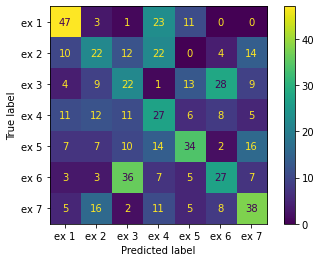

In [35]:
class_names = ['ex 1','ex 2','ex 3','ex 4','ex 5','ex 6', 'ex 7']

print("Classification report: \n", metrics.classification_report(Target_test_act, estimation_result_act, target_names=class_names))
print("Precision score: ", metrics.precision_score(Target_test_act,estimation_result_act,average=None))
print("Recall score: ", metrics.recall_score(Target_test_act,estimation_result_act,average=None))
print("Accuracy score: ", metrics.accuracy_score(Target_test_act,estimation_result_act))
print("F1 score: ", metrics.f1_score(Target_test_act,estimation_result_act,average=None))
print("F1 score macro: ", metrics.f1_score(Target_test_act,estimation_result_act,average='macro'))
print("Confusion matrix: \n", )
cm = metrics.confusion_matrix(Target_test_act, estimation_result_act)
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()

#### **Metrics of predicted results from depth camera data**

Classification report: 
               precision    recall  f1-score   support

        ex 1       0.57      0.67      0.62        86
        ex 2       0.28      0.43      0.34        86
        ex 3       0.27      0.26      0.26        88
        ex 4       0.43      0.42      0.42        83
        ex 5       0.55      0.62      0.58        91
        ex 6       0.36      0.18      0.24        89
        ex 7       0.35      0.24      0.29        86

    accuracy                           0.40       609
   macro avg       0.40      0.40      0.39       609
weighted avg       0.40      0.40      0.39       609

Accuracy score:  0.4039408866995074
Precision score:  [0.56862745 0.27819549 0.26744186 0.42682927 0.55445545 0.35555556
 0.35      ]
Recall score:  [0.6744186  0.43023256 0.26136364 0.42168675 0.61538462 0.17977528
 0.24418605]
F1 score:  [0.61702128 0.33789954 0.26436782 0.42424242 0.58333333 0.23880597
 0.28767123]
F1 score macro:  0.39333451380977397
Confusion matrix: 



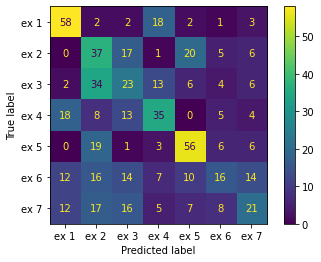

In [36]:
class_names = ['ex 1','ex 2','ex 3','ex 4','ex 5','ex 6', 'ex 7']

print("Classification report: \n", metrics.classification_report(Target_dc_test, estimation_result_dc, target_names=class_names))
print("Accuracy score: ", metrics.accuracy_score(Target_dc_test,estimation_result_dc))
print("Precision score: ", metrics.precision_score(Target_dc_test,estimation_result_dc,average=None))
print("Recall score: ", metrics.recall_score(Target_dc_test,estimation_result_dc,average=None))
print("F1 score: ", metrics.f1_score(Target_dc_test,estimation_result_dc, average=None))
print("F1 score macro: ", metrics.f1_score(Target_dc_test,estimation_result_dc,average='macro'))
print("Confusion matrix: \n")
cm = metrics.confusion_matrix(Target_dc_test, estimation_result_dc)
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()

---
---

# 3. Feature extraction and feature-level fusion for multimodal classification

<a id='task3'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 3.</b>

Prepare new feature sets for each modality and combine them to single feature representation. Compare two classifiers from scikit-learn. Train classifiers using joint feature presentation. Evaluate and compare the result using testing dataset. Do the subtasks given as
<br>   
<br> 
<p> <b>3.1</b> Similar to task 2.1, calculate PCA for accelerometer, but choose now the 10 largest principal components as 10-dim feature vector for each window. In addition, for each window calculate mean and standard deviation of each three acc channels as statistical features, resulting 6-dimensional vector. Combine these to 36-dimensional final feature vector.</p>
<br>  
<p> <b>3.2</b> Similar to task 2.2, calculate the PCA for depth images using same setup, but now choose the 10 largest principal components as feature vector. Concatenate the image sequence forming 50-dimensional feature vector from each windowed example.</p>
<br> 
<p> <b>3.3</b> Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. Normalize data between 0-1 using the training dataset. Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). Train the classifiers and evaluate and compare classifiers on testset using confusion matrices and F1 scores.</p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 3.1-3.3.
    
</div>

### **Imports**

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm 
from sklearn import metrics


normalizer = MinMaxScaler()

### **Re-window data**

In previous task, we can ignore the difference the number of windows in 2 dataset because of different recording times. However, in this task, we have to combine act data with dc data so the function below window_balance is defined to making window data but ensure the equal number of windows when choosing shorter recording 

In [38]:
def window_balance(act_data, dc_data, window_time, overlap_time):
  
   #Returns the windowed data.

    #Parameters:
    #    act_data : acc data
    #    dc_data: dc data
    #    window_time : window time to take samples
    #    overlap_time : data overlap time

    #Returns:
    #    windowed_data_act : object containing windowed data for acc
    #    windowed_data_dc:  object containing windowed data for dc

    continue_loop = True
    windowed = []
    windowed_data_act = {}
    windowed_data_dc = {}
    noWindow = 0 
    noFolderPerson = 10
    noFolferExercise = 8
    iperson = 0
    while iperson < noFolderPerson:
        key_1 = f'person_{iperson +1}'
        act_person = act_data[iperson]
        dc_person = dc_data[iperson]
        iperson = iperson + 1
        windowed_data_act[key_1] = {}
        windowed_data_dc[key_1] = {}
        continue_loop = True
        windowed = []
        iexcer = 0
        while iexcer < noFolferExercise:
            act_exercise = act_person[iexcer]
            dc_exercise = dc_person[iexcer]
            if iexcer < 4:
                key_2 = f'exercise_{iexcer+1}'
                windowed_data_act[key_1][key_2] = []
                windowed_data_dc[key_1][key_2] = []
            elif iexcer == 4:
                key_2 = f'exercise_{iexcer}'
            else:
                key_2 = f'exercise_{iexcer}'
                windowed_data_act[key_1][key_2] = []
                windowed_data_dc[key_1][key_2] = []
            iexcer = iexcer + 1
            continue_loop = True
            start_index_act = 0
            end_index_act = 0
            start_index_dc = 0
            end_index_dc = 0
            windowed = []
            while continue_loop:
                end_index_act = start_index_act + window_time*100
                end_index_dc = start_index_dc + window_time
                if end_index_act > len(act_exercise) or end_index_dc > len(dc_exercise):
                    continue_loop = False
                    break
                win_act = act_exercise.iloc[start_index_act:end_index_act, 1:]
                start_index_act = end_index_act - overlap_time*100
                windowed_data_act[key_1][key_2].append(win_act)
            
                win_dc = dc_exercise.iloc[start_index_dc:end_index_dc, 1:]
                start_index_dc = end_index_dc - overlap_time
                windowed_data_dc[key_1][key_2].append(win_dc)
                noWindow = noWindow + 1               
                
    return windowed_data_act, windowed_data_dc

### **Calculate PCA, mean and standard deviation**

In [39]:
def calPCA(data, datatest, noComp):

   #Calculates the PCA.

    #Parameters:
    #    data : training data
    #    datatest: testing data
    #    noComp : number of PCA components

    #Returns:
    #    pca_reduced : PCA for training data
    #    pca_reduced_test: PCA for test data
    #    components: individual components

    pca = PCA(n_components = noComp) 
    pca_reduced = pca.fit_transform(data)
    components = pca.components_ 
    pca_reduced_test = pca.transform(datatest)
    return np.array(pca_reduced), np.array(pca_reduced_test), components

*The above function is used to calculate the PCA*

In [40]:
def calMeanStd(data):

    # calculates the mean and standard deviation.

    #Parameters:
    #    data : data whose mean and std needs to be calculated 

    #Returns:
    #    mean : mean of the data
    #    std: standard deviation of thedata 

    mean = np.reshape(np.mean(data, axis=1),(-1,1))
    std = np.reshape(np.std(data, axis=1),(-1,1))
    return mean, std

*We have defined above function to calculate the mean and standard deviation*

### **Combine PCA with mean and standard deviation for acceleration data**

In [55]:
def act_combine_PCA_mean_std(dataPCA, dataIN):

    # combines the act data.

    #Parameters:
    #    dataPCA : array containing PCA components
    #    dataIN: array of axis

    #Returns:
    #    combined_act : combined acc data 

    x = dataIN[0]
    print(x)
#     y = dataIN[1]
#     z = dataIN[2]
#     x_reduced = dataPCA[0]
#     y_reduced = dataPCA[1]
#     z_reduced = dataPCA[2]
#     x_mean, x_std = calMeanStd(x)
#     y_mean, y_std = calMeanStd(y)
#     z_mean, z_std = calMeanStd(z)
#     combinedX = np.concatenate((x_reduced, x_mean, x_std), axis=1)
#     combinedY = np.concatenate((y_reduced, y_mean, y_std), axis=1)
#     combinedZ = np.concatenate((z_reduced, z_mean, z_std), axis=1)
#     combined_act = np.concatenate((combinedX, combinedY, combinedZ), axis=1)
#     return combined_act


In [42]:
def dc_combine_PCA(dataPCA):

    # combines the dc data

    #Parameters:
    #    dataPCA : array containing PCA components

    #Returns:
    #    combined_dc : combined dc data 


    i1_reduced = dataPCA[0]
    i2_reduced = dataPCA[1]
    i3_reduced = dataPCA[2]
    i4_reduced = dataPCA[3]
    i5_reduced = dataPCA[4]
    combined_dc = np.concatenate((i1_reduced, i2_reduced, i3_reduced,
                                 i4_reduced, i5_reduced), axis=1)
    return combined_dc

*In the above function we combine all the data including mean, std and PCA*

### **Main process**

*Window raw data from file, split into train set/test set, downsample act data. Complete necessary steps as task 2.*

In [43]:
act_windowed_balanced, dc_windowed_balance = window_balance(act_data, dc_data, 5, 3)
            

print('The shape of an individual window of act array is' ,np.array(act_windowed_balanced['person_1']['exercise_1'][0]).shape)
print('The shape of an individual window of dc array is' ,np.array(dc_windowed_balance['person_1']['exercise_1'][0]).shape)

act_train_data , act_test_data = train_test_split(act_windowed_balanced)
dc_train_data, dc_test_data = train_test_split(dc_windowed_balance)

act_train_data_sampled = downsample(act_train_data)
act_test_data_sampled = downsample(act_test_data)

The shape of an individual window of act array is (500, 3)
The shape of an individual window of dc array is (5, 192)
person_1
person_2
person_3
person_4
person_5
person_6
person_7
person_8
person_9
person_10


Main proccess to complete requirements of task 3 (training and predict exercise for a joint feature). In this part, we call out above prepared function and, multimodal fusion and predict the exercise class of test set.  This process include :

1.   Extract feature and standardized the output
2.   Reduce dimension by PCA, add mean and std to acceleration data.
3. Concatenate sequence from step 2 to a single vector then normalize it to scale [0,1]
4. Apply SVM and GaussianNB to predict exercise class. 


In [56]:
#  Step 1: Extract feature and standardized the output 
X_feature,Y_feature,Z_feature,Target_train = act_extract_std(act_train_data_sampled)
X_feature_test,Y_feature_test,Z_feature_test,Target_test = act_extract_std(act_test_data_sampled)

# Step 2: Reduce dimension by PCA 
X_reduce_PCA, X_reduce_PCA_test, X_component = calPCA(X_feature, X_feature_test, 10)
Y_reduce_PCA, Y_reduce_PCA_test, Y_component = calPCA(Y_feature, Y_feature_test,  10)
Z_reduce_PCA, Z_reduce_PCA_test, Z_component = calPCA(Z_feature, Z_feature_test,  10)

 # Calculate and Add mean and std to acceleration data 
act_PCA = act_combine_PCA_mean_std([X_reduce_PCA,Y_reduce_PCA,Z_reduce_PCA ],
                                   [X_feature,Y_feature,Z_feature])
# act_PCA_test = act_combine_PCA_mean_std([X_reduce_PCA_test,Y_reduce_PCA_test,Z_reduce_PCA_test ],
#                                         [X_feature_test,Y_feature_test,Z_feature_test])


# I1,I2,I3,I4,I5,Target_train = dc_extract_std(dc_train_data)
# I1_test,I2_test,I3_test,I4_test,I5_test,Target_test = dc_extract_std(dc_test_data)

# I1_reduce_PCA, I1_reduce_PCA_test, I1_component = calPCA(I1, I1_test, 10)
# I2_reduce_PCA, I2_reduce_PCA_test, I2_component = calPCA(I2, I2_test, 10)
# I3_reduce_PCA, I3_reduce_PCA_test, I3_component = calPCA(I3, I3_test, 10)
# I4_reduce_PCA, I4_reduce_PCA_test, I4_component = calPCA(I4, I4_test, 10)
# I5_reduce_PCA, I5_reduce_PCA_test, I5_component = calPCA(I5, I5_test, 10)

# dc_PCA = dc_combine_PCA([I1_reduce_PCA,I2_reduce_PCA,I3_reduce_PCA,
#                          I4_reduce_PCA,I5_reduce_PCA])
# dc_PCA_test = dc_combine_PCA([I1_reduce_PCA_test,I2_reduce_PCA_test,I3_reduce_PCA_test,
#                               I4_reduce_PCA_test,I5_reduce_PCA_test ])

# #  Step 3: Concatenate sequence from step 2 to a single vector 

# combine_vector = np.concatenate((act_PCA[np.newaxis,0,:], dc_PCA[np.newaxis,0,:]), axis=1)
# for i in range(1,min(act_PCA.shape[0],dc_PCA.shape[0])):
#     temp_combine = np.concatenate((act_PCA[np.newaxis,i,:], dc_PCA[np.newaxis,i,:]), axis=1)
#     combine_vector = np.concatenate((combine_vector,temp_combine), axis=0)

# combine_vect = np.array(combine_vector)
# print('The shape of combined train data is:',combine_vect.shape)


# combine_vector_test = np.concatenate((act_PCA_test[np.newaxis,0,:], dc_PCA_test[np.newaxis,0,:]), axis=1)
# for i in range(1,min(act_PCA_test.shape[0],dc_PCA_test.shape[0])):
#     temp_combine = np.concatenate((act_PCA[np.newaxis,i,:], dc_PCA_test[np.newaxis,i,:]), axis=1)
#     combine_vector_test = np.concatenate((combine_vector_test,temp_combine), axis=0)

# combine_vect_test = np.array(combine_vector_test)
# print('The shape of combined test data is:',combine_vect_test.shape)

# #  Normalize vector  
# combine_vect_normalized = np.array(normalizer.fit_transform(combine_vect)) # Normalizing training data
# combine_vect_test_normalized = np.array(normalizer.transform(combine_vect_test)) # Normalizing test data

# print('The shape of combined normalized train data is:',combine_vect_normalized.shape)
# print('The shape of combined normalized test data is:',combine_vect_test_normalized.shape)


[array([-0.67368771, -0.46988782, -0.48003021, -0.40375932, -0.34647955,
       -0.16203698,  0.13070811,  0.13928268,  0.35246516,  0.48136876,
        0.43730207,  0.40885437,  0.43078835,  0.40361645,  0.646345  ,
        1.04945195,  1.19231219,  1.19679199,  1.09338368,  1.20001223,
        1.10686886,  1.17007189,  1.30179821,  1.45101637,  1.58811718,
        1.20343108,  1.11128444,  0.99414314,  0.87806611,  0.73275471,
        0.64147664,  0.47182874,  0.46531594,  0.44848139,  0.47080741,
        0.43982494,  0.35302204, -0.10004765, -0.15335523, -0.20839993,
       -0.39473409, -0.48198007, -0.63223186, -0.78259334, -0.86392961,
       -0.98102681, -1.02966216, -1.04129788, -0.96077886, -0.97761625,
       -0.97420217, -0.8620862 , -0.80515111, -1.05316238, -0.70689106,
       -1.00484935, -0.77129286, -0.89197017, -2.0868854 , -1.53383066,
       -1.10985475, -1.51332757, -1.10390991, -0.9412363 , -1.83778485,
       -1.23189291, -1.03368103, -1.13688892, -1.48227353, -1.6

*In the above cell we use all the perviously defined function to get our data prepared for the Machine Learning model*

#### **Applying SVM**

Classification report: 
               precision    recall  f1-score   support

        ex 1       0.94      0.60      0.73        85
        ex 2       0.39      0.81      0.53        84
        ex 3       0.40      0.47      0.43        86
        ex 4       0.26      0.31      0.28        80
        ex 5       0.59      0.37      0.45        90
        ex 6       0.31      0.11      0.17        88
        ex 7       0.36      0.36      0.36        85

    accuracy                           0.43       598
   macro avg       0.47      0.43      0.42       598
weighted avg       0.47      0.43      0.42       598

Accuracy score:  0.431438127090301
Precision score:  [0.94444444 0.39306358 0.4040404  0.25510204 0.58928571 0.3125
 0.36046512]
Recall score:  [0.6        0.80952381 0.46511628 0.3125     0.36666667 0.11363636
 0.36470588]
F1 score:  [0.73381295 0.52918288 0.43243243 0.28089888 0.45205479 0.16666667
 0.3625731 ]
F1 score macro:  0.4225173854938666
Confusion matrix: 


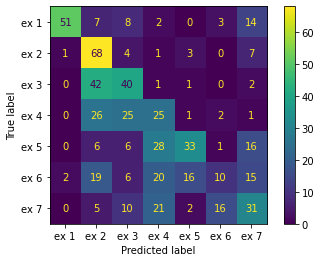

In [45]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(combine_vect_normalized, Target_train)
rbf_prediction = rbf_svc.predict(combine_vect_test_normalized)

class_names = ['ex 1','ex 2','ex 3','ex 4','ex 5','ex 6', 'ex 7']

print("Classification report: \n", metrics.classification_report(Target_test, rbf_prediction, target_names=class_names))
print("Accuracy score: ", metrics.accuracy_score(Target_test,rbf_prediction))
print("Precision score: ", metrics.precision_score(Target_test,rbf_prediction,average=None))
print("Recall score: ", metrics.recall_score(Target_test,rbf_prediction,average=None))
print("F1 score: ", metrics.f1_score(Target_test,rbf_prediction, average=None))
print("F1 score macro: ", metrics.f1_score(Target_test,rbf_prediction,average='macro'))
print("Confusion matrix: \n", metrics.plot_confusion_matrix(rbf_svc,combine_vect_test_normalized, np.array(Target_test).reshape(-1, 1), 
                                                            display_labels=class_names))

*In the above cell we train SVM model and evaluate it as well*
 


#### **Applying GaussianNB**

Classification report: 
               precision    recall  f1-score   support

        ex 1       0.80      0.53      0.64        85
        ex 2       0.33      0.69      0.44        84
        ex 3       0.19      0.15      0.17        86
        ex 4       0.45      0.41      0.43        80
        ex 5       0.57      0.33      0.42        90
        ex 6       0.02      0.01      0.01        88
        ex 7       0.13      0.18      0.15        85

    accuracy                           0.33       598
   macro avg       0.36      0.33      0.32       598
weighted avg       0.35      0.33      0.32       598

Accuracy score:  0.32608695652173914
Precision score:  [0.80357143 0.3258427  0.19402985 0.44594595 0.56603774 0.01724138
 0.13392857]
Recall score:  [0.52941176 0.69047619 0.15116279 0.4125     0.33333333 0.01136364
 0.17647059]
F1 score:  [0.63829787 0.44274809 0.16993464 0.42857143 0.41958042 0.01369863
 0.15228426]
F1 score macro:  0.3235879066735114
Confusion matrix: 


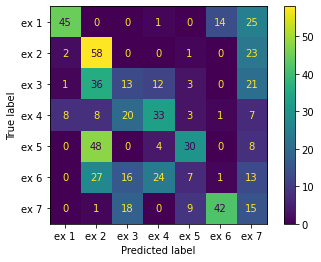

In [46]:
gsnb = GaussianNB()
gsnb.fit(combine_vect_normalized, Target_train)
gsnb_prediction = gsnb.predict(combine_vect_test_normalized)

class_names = ['ex 1','ex 2','ex 3','ex 4','ex 5','ex 6', 'ex 7']

print("Classification report: \n", metrics.classification_report(Target_test, gsnb_prediction, target_names=class_names))
print("Accuracy score: ", metrics.accuracy_score(Target_test,gsnb_prediction))
print("Precision score: ", metrics.precision_score(Target_test,gsnb_prediction,average=None))
print("Recall score: ", metrics.recall_score(Target_test,gsnb_prediction,average=None))
print("F1 score: ", metrics.f1_score(Target_test,gsnb_prediction, average=None))
print("F1 score macro: ", metrics.f1_score(Target_test,gsnb_prediction,average='macro'))
print("Confusion matrix: \n", metrics.plot_confusion_matrix(gsnb,combine_vect_test_normalized, np.array(Target_test).reshape(-1, 1), 
                                                            display_labels=class_names))


*In the above cell we train GaussianNB model and evaluate it as well*
 


---
---


# 4. Decision-level fusion for multimodal classification

<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 4.</b>

Use features calculated for each modality in task 3. Choose base classifier for each modality from scikit-learn. **Train classifiers for each modality feature** presentations separately and combine the outputs in decision level. Evaluate and compare the result on testing dataset. Do the subtasks given as
<br>
<br> 
<p> <b>4.1</b> Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0). 
Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (<i>C</i> parameter and RBF-kernel <i>gamma</i> in SVM as well as <i>n_estimators</i> and <i>learning_rate</i> in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values $C = [0.1, 1.0, 10.0, 100.0]$, $gamma=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0]$, $n\_estimators = [50, 100, 500, 1000]$, and $learning\_rate = [0.1, 0.25, 0.5, 0.75,1.0]$. Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why? </p>
<br>
<p> <b>4.2</b> Predict probabilistic outputs of each trained classifier for both modalities using the test set. </p>
<br>
<p> <b>4.3</b> Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e., $SVM_{acc}+SVM_{depth}$, $AdaBoost_{acc}+AdaBoost_{depth}$, $SVM_{acc}+AdaBoost_{depth}$, $AdaBoost_{acc}+SVM_{depth}$)</p>
<br>
Document your work, evaluate the results, and analyse the outcomes in each subtasks 4.1-4.3.
    
</div>

In [47]:
act_PCA.shape

(1487, 36)

### **Defining parameters**

In [ ]:
C=[0.1,1.0,10.0,100.0]
gamma=[0.1,0.25,0.5,0.75,1.0,2.0]
n_estimators=[50,100,500,1000]
learning_rate=[0.1,0.25,0.5,0.75,1.0]

svm_parameters = {'C':C, 'gamma': gamma,  }
adaBoost_parameters = {'learning_rate': learning_rate,'n_estimators':n_estimators }


svm_model = svm.SVC(kernel='rbf')
ada_model = AdaBoostClassifier(random_state=0)


svm_clf = GridSearchCV(svm_model, svm_parameters, cv=10)
ada_clf = GridSearchCV(ada_model, adaBoost_parameters, cv=10)


*In the cell above we define the parameters and the grid search algorithm will find the best combination of these parameters*

*For SVM: The C parameter is regularization parameter. The strength of the regularization is inversely proportional to C*

*For SVM: gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.*

*For AdaBoost: Learning rate shrinks the contribution of each classifier by the value specifies. It should be noted that there is a trade-off between learning_rate and n_estimators*

*For AdaBoost: The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.*

### **Searching best SVM hyper-parameters**

Firstly, normalize data both modalities from task 3

In [ ]:
act_train_task3_normalized = normalizer.fit_transform(act_PCA) 
act_test_task3_normalized = normalizer.transform(act_PCA_test) 

dc_train_task3_normalized = normalizer.fit_transform(dc_PCA) 
dc_test_task3_normalized = normalizer.transform(dc_PCA_test) 

*In the above cell we have used the MinMax Scaler defined in previous task to normalize our data*

### **Searching best SVM hyper-parameters for acceleration data**
##### ***This might take long due to cross validation***

In [ ]:
svm_clf.fit(act_train_task3_normalized, Target_train)
svm_best_params_act = svm_clf.best_params_
print('Best hyperparameters for SVM training act data are',svm_best_params_act)

### **Searching best SVM hyper-parameters for depth image data**
##### ***This might take long due to cross validation***

In [ ]:
svm_clf.fit(dc_train_task3_normalized, Target_train)
svm_best_params_dc = svm_clf.best_params_
print('Best hyperparameters for SVM training dc data are',svm_best_params_dc)

### **Searching best AdaBoost hyper-parameters for acceleration data**
##### ***This might take long due to cross validation (longer than above)***

In [ ]:
ada_clf.fit(act_train_task3_normalized, Target_train)
ada_best_params_act = ada_clf.best_params_
print('Best hyperparameters for AdaBoost training act data are', ada_best_params_act)

### **Searching best AdaBoost hyper-parameters for depth image data**

In [ ]:
ada_clf.fit(dc_train_task3_normalized, Target_train)
ada_best_params_dc = ada_clf.best_params_
print('Best hyperparameters for AdaBoost training dc data are', ada_best_params_dc)

*Now that we have best parameters for our classifiers we will train again using them*

### **Training SVM with best hyper-parameters and predict test data**

In [ ]:
svm_best_act = svm.SVC(kernel='rbf', C=svm_best_params_act['C'], gamma=svm_best_params_act['gamma'], probability=True)
svm_best_act.fit(act_train_task3_normalized, Target_train)

svm_best_dc = svm.SVC(kernel='rbf', C=svm_best_params_dc['C'], gamma=svm_best_params_dc['gamma'], probability=True)
svm_best_dc.fit(dc_train_task3_normalized, Target_train)


*Prediction for acceleration data and depth image data of test set*

In [ ]:
svm_pred_act = svm_best_act.predict(act_test_task3_normalized)
svm_prob_act = svm_best_act.predict_proba(act_test_task3_normalized)
# print('The predicted probabilities for acc data using SVM are')
# print(svm_prob_act)

svm_pred_dc = svm_best_dc.predict(dc_test_task3_normalized)
svm_prob_dc = svm_best_dc.predict_proba(dc_test_task3_normalized)
# print('The predicted probabilities for dc data using SVM are')
# print(svm_prob_dc)

### **Training AdaBoost with best hyper-parameters and predict test data**

In [ ]:
ada_best_act = AdaBoostClassifier(random_state=0, learning_rate=ada_best_params_act['learning_rate'], n_estimators=ada_best_params_act['n_estimators'] )
ada_best_act.fit(act_train_task3_normalized, Target_train)

ada_best_dc = AdaBoostClassifier(random_state=0, learning_rate=ada_best_params_dc['learning_rate'], n_estimators=ada_best_params_dc['n_estimators'] )
ada_best_dc.fit(dc_train_task3_normalized, Target_train)

*Prediction for acceleration data and depth image data of test set*

In [ ]:
ada_pred_act = ada_best_act.predict(act_test_task3_normalized)
ada_prob_act = ada_best_act.predict_proba(act_test_task3_normalized)
# print('The predicted probabilities for dc data using AdaBoost are')
# print(ada_prob_act)

ada_pred_dc = ada_best_dc.predict(dc_test_task3_normalized)
ada_prob_dc = ada_best_dc.predict_proba(dc_test_task3_normalized)
# print('The predicted probabilities for dc data using AdaBoost are')
# print(ada_prob_dc)


### **4.3 Simple Combination**

*Putting it in one cell for better comparison of results in the end*

In [ ]:
#Individual f1 score macro for each classifier:
print("F1 score macro of individual classifier... ")
print('Classifier SVM_acc ', metrics.f1_score(Target_test,svm_pred_act, average='macro'))
print('Classifier SVM_dc ', metrics.f1_score(Target_test,svm_pred_dc, average='macro'))
print('Classifier ADA_acc ', metrics.f1_score(Target_test,ada_pred_act, average='macro'))
print('Classifier ADA_dc ', metrics.f1_score(Target_test,ada_pred_dc, average='macro'))

excercise_label = np.array([1,2,3,4,5,6,7])

#Create posterior scores array
posterior_scores_svmacc_svmdc = np.array((svm_prob_act, svm_prob_dc))
posterior_scores_adaacc_adadc = np.array((ada_prob_act, ada_prob_dc))
posterior_scores_svmacc_adadc = np.array((svm_prob_act, ada_prob_dc))
posterior_scores_adaacc_svmdc = np.array((ada_prob_act, svm_prob_dc))

class_names = ['ex 1','ex 2','ex 3','ex 4','ex 5','ex 6', 'ex 7']

print("F1 score macro of combination SVM_acc and SVM_dc following rules... ")
test_acc =  metrics.f1_score(Target_test, excercise_label[np.argmax(np.prod(posterior_scores_svmacc_svmdc,axis=0),axis=1)], average='macro')
print('Prod: ', test_acc)

test_acc = metrics.f1_score(Target_test, excercise_label[np.argmax(np.sum(posterior_scores_svmacc_svmdc, axis=0),axis=1)], average='macro')
print('Sum: ', test_acc)

test_acc = metrics.f1_score(Target_test, excercise_label[np.argmax(np.max(posterior_scores_svmacc_svmdc, axis=0),axis=1)], average='macro')
print('Max: ', test_acc)

test_acc = metrics.f1_score(Target_test, excercise_label[np.argmax(np.min(posterior_scores_svmacc_svmdc, axis=0),axis=1)], average='macro')
print('Min: ', test_acc)

print("F1 score macro of combination ADA_acc and ADA_dc following rules... ")
test_acc =  metrics.f1_score(Target_test, excercise_label[np.argmax(np.prod(posterior_scores_adaacc_adadc,axis=0),axis=1)], average='macro')
print('Prod: ', test_acc)

test_acc = metrics.f1_score(Target_test, excercise_label[np.argmax(np.sum(posterior_scores_adaacc_adadc, axis=0),axis=1)], average='macro')
print('Sum: ', test_acc)

test_acc = metrics.f1_score(Target_test, excercise_label[np.argmax(np.max(posterior_scores_adaacc_adadc, axis=0),axis=1)], average='macro')
print('Max: ', test_acc)

test_acc = metrics.f1_score(Target_test, excercise_label[np.argmax(np.min(posterior_scores_adaacc_adadc, axis=0),axis=1)], average='macro')
print('Min: ', test_acc)

print("F1 score macro of combination SVM_acc and ADA_dc following rules... ")
test_acc =  metrics.f1_score(Target_test, excercise_label[np.argmax(np.prod(posterior_scores_svmacc_adadc,axis=0),axis=1)], average='macro')
print('Prod: ', test_acc)

test_acc = metrics.f1_score(Target_test, excercise_label[np.argmax(np.sum(posterior_scores_svmacc_adadc, axis=0),axis=1)], average='macro')
print('Sum: ', test_acc)


test_acc = metrics.f1_score(Target_test, excercise_label[np.argmax(np.max(posterior_scores_svmacc_adadc, axis=0),axis=1)], average='macro')
print('Max: ', test_acc)

test_acc = metrics.f1_score(Target_test, excercise_label[np.argmax(np.min(posterior_scores_svmacc_adadc, axis=0),axis=1)], average='macro')
print('Min: ', test_acc)

print("F1 score macro of combination ADA_acc and SVM_dc following rules... ")
test_acc =  metrics.f1_score(Target_test, excercise_label[np.argmax(np.prod(posterior_scores_adaacc_svmdc,axis=0),axis=1)], average='macro')
print('Prod: ', test_acc)

test_acc = metrics.f1_score(Target_test, excercise_label[np.argmax(np.sum(posterior_scores_adaacc_svmdc, axis=0),axis=1)], average='macro')
print('Sum: ', test_acc)

test_acc = metrics.f1_score(Target_test, excercise_label[np.argmax(np.max(posterior_scores_adaacc_svmdc, axis=0),axis=1)], average='macro')
print('Max: ', test_acc)

test_acc = metrics.f1_score(Target_test, excercise_label[np.argmax(np.min(posterior_scores_adaacc_svmdc, axis=0),axis=1)], average='macro')
print('Min: ', test_acc)



##### **4.3.1 Confusion Matrix**

*confusion matrix display quite messy in this cell, they should have been more well arraged if I have more time. But by this cell display confusion matrix, I also can evaluate the efficientcy of combination results.*

In [ ]:
#Individual confusion matrix for each classifier:
class_names = ['ex 1','ex 2','ex 3','ex 4','ex 5','ex 6', 'ex 7']

print("    Confusion matrix: \n")
print('Classifier SVM_acc ')
cm = metrics.confusion_matrix(Target_test, svm_pred_act)
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
print('Classifier SVM_dc ')
cm = metrics.confusion_matrix(Target_test, svm_pred_dc)
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
print('Classifier ADA_acc ')
cm = metrics.confusion_matrix(Target_test, ada_pred_act)
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
print('Classifier ADA_dc ')
cm = metrics.confusion_matrix(Target_test, ada_pred_dc)
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()

excercise_label = np.array([1,2,3,4,5,6,7])


print("Confusion matrix of combination SVM_acc and SVM_dc following rules... ")
print('Prod: ')

cm = metrics.confusion_matrix(Target_test, excercise_label[np.argmax(np.prod(posterior_scores_svmacc_svmdc,axis=0),axis=1)])
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()

print('Sum: ')
cm = metrics.confusion_matrix(Target_test, excercise_label[np.argmax(np.sum(posterior_scores_svmacc_svmdc,axis=0),axis=1)])
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()

print('Max: ')
cm = metrics.confusion_matrix(Target_test, excercise_label[np.argmax(np.max(posterior_scores_svmacc_svmdc,axis=0),axis=1)])
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()


print('Min: ')
cm = metrics.confusion_matrix(Target_test, excercise_label[np.argmax(np.min(posterior_scores_svmacc_svmdc,axis=0),axis=1)])
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()

print("Confusion matrix of combination ADA_acc and ADA_dc following rules... ")
print('Prod: ')
print("    Confusion matrix: \n")
cm = metrics.confusion_matrix(Target_test, excercise_label[np.argmax(np.prod(posterior_scores_adaacc_adadc,axis=0),axis=1)])
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()


print('Sum: ')
cm = metrics.confusion_matrix(Target_test, excercise_label[np.argmax(np.sum(posterior_scores_adaacc_adadc,axis=0),axis=1)])
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()

print('Max: ')
cm = metrics.confusion_matrix(Target_test, excercise_label[np.argmax(np.max(posterior_scores_adaacc_adadc,axis=0),axis=1)])
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()

print('Min: ')
cm = metrics.confusion_matrix(Target_test, excercise_label[np.argmax(np.min(posterior_scores_adaacc_adadc,axis=0),axis=1)])
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()

print("Confusion matrix of combination SVM_acc and ADA_dc following rules... ")
print('Prod: ')
cm = metrics.confusion_matrix(Target_test, excercise_label[np.argmax(np.prod(posterior_scores_svmacc_adadc,axis=0),axis=1)])
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()

print('Sum: ')
cm = metrics.confusion_matrix(Target_test, excercise_label[np.argmax(np.sum(posterior_scores_svmacc_adadc,axis=0),axis=1)])
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()

print('Max: ')
cm = metrics.confusion_matrix(Target_test, excercise_label[np.argmax(np.max(posterior_scores_svmacc_adadc,axis=0),axis=1)])
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()

print('Min: ')
cm = metrics.confusion_matrix(Target_test, excercise_label[np.argmax(np.min(posterior_scores_svmacc_adadc,axis=0),axis=1)])
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()

print("Confusion matrix of combination ADA_acc and SVM_dc following rules... ")
print('Prod: ')
cm = metrics.confusion_matrix(Target_test, excercise_label[np.argmax(np.prod(posterior_scores_adaacc_svmdc,axis=0),axis=1)])
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()

print('Sum: ')
cm = metrics.confusion_matrix(Target_test, excercise_label[np.argmax(np.sum(posterior_scores_adaacc_svmdc,axis=0),axis=1)])
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()

print('Max: ')
cm = metrics.confusion_matrix(Target_test, excercise_label[np.argmax(np.max(posterior_scores_adaacc_svmdc,axis=0),axis=1)])
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()

print('Min: ')
cm = metrics.confusion_matrix(Target_test, excercise_label[np.argmax(np.min(posterior_scores_adaacc_svmdc,axis=0),axis=1)])
metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()


# 5. Bonus task: Multimodal biometric identification of persons (optional)

<a id='task5'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 5.</b>

Can you build a classifier that recognizes the person who is performing the exercise? Use same 10 person dataset and split it so that first 25% of each long exercise sequence is used for training and rest 75% of each sequence is used for testing the classifier. Use same 5 second windowing with 3 seconds overlap to prepare the examples. Note that, now the person identity is the class label instead of exercise type. Max. 10 points are given but you can earn points from partial solution, as well.
<br> 
<br> 
<p> <b>5.1</b> Build a classifier to identify persons based on the features and one of the models given in task 4 (max. 5 points).</p>
<br> 
<p> <b>5.2</b> Can you build your own solution (using new features, new classification model or different fusion approaches) to beat the approach in Task 5.1 ? (max. 5 points) </p>
<br>  
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

#################################

***Bonus task is Khanh Nguyen's personal work. please credit only Khanh Nguyen for this task***

#################################

## **Preparing data**

### **Split train/test set from recording data**

Because diffrent criterion in splitting train/test set, I cannot reuse old function. This function is defined to split 10 person dataset so that first 25% of each long exercise sequence is used for training and rest 75% of each sequence is used for testing the classifier.

The output of this function has structure similar structure output of function read_data_from_folder. This is an advantage for me to reuse fuction window_balance from task 3.

In [ ]:
def task5_train_test_split(act_data, dc_data):
    act_train_data = {}
    act_test_data = {}
    dc_train_data = {}
    dc_test_data = {}
    noWindow = 0 
    noFolderPerson = act_data.shape[0]
    noFolferExercise = act_data.shape[1]
    iperson = 0
    while iperson < noFolderPerson:
        key_1 = f'person_{iperson +1}' # dynamically generating person keys 
        act_person = act_data[iperson]
        dc_person = dc_data[iperson]
        
        act_train_data[iperson] = {}
        act_test_data[iperson] = {}
        dc_train_data[iperson] = {}
        dc_test_data[iperson] = {}
        
        iexcer = 0
        while iexcer < noFolferExercise: # inside individiual file
            key_2 = f'exercise_{iexcer+1}'
            act_train_data[iperson][iexcer] = []
            act_test_data[iperson][iexcer] = []
            dc_train_data[iperson][iexcer] = []
            dc_test_data[iperson][iexcer] = []

            act_exercise = act_person[iexcer]
            dc_exercise = dc_person[iexcer]
            

            end_index_act_train = round(0.25*len(act_exercise))
            end_index_dc_train = round(0.25*len(dc_exercise))
 
            act_train_in_ex = act_exercise.iloc[0:end_index_act_train, 0:]
            # print(np.array(act_train_in_ex).shape)
            act_test_in_ex = act_exercise.iloc[end_index_act_train::, 0:]
            dc_train_in_ex = dc_exercise.iloc[0:end_index_dc_train, 0:]
            dc_test_in_ex = dc_exercise.iloc[end_index_dc_train::, 0:]

            act_train_data[iperson][iexcer] = act_train_in_ex
            act_test_data[iperson][iexcer] = act_test_in_ex
            dc_train_data[iperson][iexcer] = dc_train_in_ex
            dc_test_data[iperson][iexcer] = dc_test_in_ex

            iexcer = iexcer + 1
        iperson = iperson + 1

    return act_train_data, act_test_data, dc_train_data, dc_test_data

act_data = read_data_from_folders('act', ids, (10,8))
dc_data = read_data_from_folders('dc_0.05_0.05', ids, (10,8))
act_train_data, act_test_data, dc_train_data, dc_test_data = task5_train_test_split(act_data, dc_data)

print(np.array(act_train_data[0][0]).shape)
print(np.array(act_test_data[0][0]).shape)



### **Windowing train/test data and downsample acceleration data**

Because I reused window_balance function, the structure of this output is {person:{exercise:[]}} similar as the structure intriduced in task 1

In [ ]:

act_train_windowed, dc_train_windowed = window_balance(act_train_data, dc_train_data, 5, 3)
act_test_windowed, dc_test_windowed = window_balance(act_test_data, dc_test_data, 5, 3)
            

print('The shape of an individual window of act array is' ,np.array(act_train_windowed['person_1']['exercise_1'][0]).shape)
print('The shape of an individual window of dc array is' ,np.array(dc_train_windowed['person_1']['exercise_1'][0]).shape)


act_train_data_sampled = downsample(act_train_windowed)
act_test_data_sampled = downsample(act_test_windowed)

print(np.array(act_train_data_sampled['person_1']['exercise_1']).shape)

### **Reform - standardize data and generate target set**

Reform data to (number of window, features), standardize data and generate target dataset according to each windows.

In [ ]:
def reformData_std(dataIn):
    feature = []
    Target = []
    pers = 0
    for person in dataIn:
        pers = pers + 1
        for key in dataIn[person]:
            for i in range(len(dataIn[person][key])):
                features_data = dataIn[person][key][i]
                features_data_standardized = scaler.fit_transform(features_data)
                tar = pers
                feature.append(features_data)
                Target.append(tar)
    feature_arr = np.array(feature) 
    Target_arr = np.array(Target)
    return feature_arr, Target_arr

act_train_reformed, Target_act_train = reformData_std(act_train_data_sampled)
dc_train_reformed, Target_dc_train = reformData_std(dc_train_windowed)
act_test_reformed, Target_act_test = reformData_std(act_test_data_sampled)
dc_test_reformed, Target_dc_test = reformData_std(dc_test_windowed)

Target_train = Target_act_train
Target_test = Target_dc_test

print(np.array(act_train_reformed).shape)
print(np.array(act_test_reformed).shape)
print(Target_dc_test )

### **Extract features**

In [ ]:
def act_extract(dataIn):

    X_feature = dataIn[:,:,0]
    Y_feature = dataIn[:,:,1]
    Z_feature = dataIn[:,:,2]

    return X_feature,Y_feature,Z_feature

def dc_extract(dataIn):
    I1 = dataIn[:,0,:]
    I2 = dataIn[:,1,:]
    I3 = dataIn[:,2,:]
    I4 = dataIn[:,3,:]
    I5 = dataIn[:,4,:]
    return I1,I2,I3,I4,I5

## **Main process**

I applied model, parameter and process in task 4 into task 5. Also using SVM and AdaBoost with simple combinations.

In [ ]:
X_feature,Y_feature,Z_feature = act_extract(act_train_reformed)
X_feature_test,Y_feature_test,Z_feature_test = act_extract(act_test_reformed)

X_reduce_PCA, X_reduce_PCA_test, X_component = calPCA(X_feature, X_feature_test, 10)
Y_reduce_PCA, Y_reduce_PCA_test, Y_component = calPCA(Y_feature, Y_feature_test,  10)
Z_reduce_PCA, Z_reduce_PCA_test, Z_component = calPCA(Z_feature, Z_feature_test,  10)

act_PCA = act_combine_PCA_mean_std([X_reduce_PCA,Y_reduce_PCA,Z_reduce_PCA ],
                                   [X_feature,Y_feature,Z_feature])
act_PCA_test = act_combine_PCA_mean_std([X_reduce_PCA_test,Y_reduce_PCA_test,Z_reduce_PCA_test ],
                                        [X_feature_test,Y_feature_test,Z_feature_test])


I1,I2,I3,I4,I5 = dc_extract(dc_train_reformed)
I1_test,I2_test,I3_test,I4_test,I5_test = dc_extract(dc_test_reformed)

I1_reduce_PCA, I1_reduce_PCA_test, I1_component = calPCA(I1, I1_test, 10)
I2_reduce_PCA, I2_reduce_PCA_test, I2_component = calPCA(I2, I2_test, 10)
I3_reduce_PCA, I3_reduce_PCA_test, I3_component = calPCA(I3, I3_test, 10)
I4_reduce_PCA, I4_reduce_PCA_test, I4_component = calPCA(I4, I4_test, 10)
I5_reduce_PCA, I5_reduce_PCA_test, I5_component = calPCA(I5, I5_test, 10)

dc_PCA = dc_combine_PCA([I1_reduce_PCA,I2_reduce_PCA,I3_reduce_PCA,
                         I4_reduce_PCA,I5_reduce_PCA])
dc_PCA_test = dc_combine_PCA([I1_reduce_PCA_test,I2_reduce_PCA_test,I3_reduce_PCA_test,
                              I4_reduce_PCA_test,I5_reduce_PCA_test ])

### **Find best parameter of SVM and ADA**

In [ ]:
act_train_normalized = normalizer.fit_transform(act_PCA)
act_test_normalized = normalizer.transform(act_PCA_test)

dc_train_normalized = normalizer.fit_transform(dc_PCA) 
dc_test_normalized = normalizer.transform(dc_PCA_test) 

svm_clf.fit(act_train_normalized, Target_train)
svm_best_params_act = svm_clf.best_params_
print('Best hyperparameters for SVM training act data are',svm_best_params_act)
svm_clf.fit(dc_train_normalized, Target_train)
svm_best_params_dc = svm_clf.best_params_
print('Best hyperparameters for SVM training dc data are',svm_best_params_dc)

ada_clf.fit(act_train_normalized, Target_train)
ada_best_params_act = ada_clf.best_params_
print('Best hyperparameters for AdaBoost training act data are', ada_best_params_act)

ada_clf.fit(dc_train_normalized, Target_train)
ada_best_params_dc = ada_clf.best_params_
print('Best hyperparameters for AdaBoost training dc data are', ada_best_params_dc)

### **Apply SVM and ADA with best parameter to test set**

In [ ]:
svm_best_act = svm.SVC(kernel='rbf', C=svm_best_params_act['C'], gamma=svm_best_params_act['gamma'], probability=True)
svm_best_act.fit(act_train_normalized, Target_train)

svm_best_dc = svm.SVC(kernel='rbf', C=svm_best_params_dc['C'], gamma=svm_best_params_dc['gamma'], probability=True)
svm_best_dc.fit(dc_train_normalized, Target_train)

svm_pred_act = svm_best_act.predict(act_test_normalized)
svm_prob_act = svm_best_act.predict_proba(act_test_normalized)

svm_pred_dc = svm_best_dc.predict(dc_test_normalized)
svm_prob_dc = svm_best_dc.predict_proba(dc_test_normalized)

ada_best_act = AdaBoostClassifier(random_state=0, learning_rate=ada_best_params_act['learning_rate'], n_estimators=ada_best_params_act['n_estimators'] )
ada_best_act.fit(act_train_normalized, Target_train)

ada_best_dc = AdaBoostClassifier(random_state=0, learning_rate=ada_best_params_dc['learning_rate'], n_estimators=ada_best_params_dc['n_estimators'] )
ada_best_dc.fit(dc_train_normalized, Target_train)

ada_pred_act = ada_best_act.predict(act_test_normalized)
ada_prob_act = ada_best_act.predict_proba(act_test_normalized)

ada_pred_dc = ada_best_dc.predict(dc_test_normalized)
ada_prob_dc = ada_best_dc.predict_proba(dc_test_normalized)


### **Simple combination**

In [ ]:

#Individual test f1 score macror for each classifier:
print("F1 score macro of individual classifier... ")
print('Classifier SVM_acc ', metrics.f1_score(Target_test,svm_pred_act, average='macro'))
print('Classifier SVM_dc ', metrics.f1_score(Target_test,svm_pred_dc, average='macro'))
print('Classifier ADA_acc ', metrics.f1_score(Target_test,ada_pred_act, average='macro'))
print('Classifier ADA_dc ', metrics.f1_score(Target_test,ada_pred_dc, average='macro'))

person_label = np.array([1,2,3,4,5,6,7,8,9,10])

#Create posterior scores array
posterior_scores_svmacc_svmdc = np.array((svm_prob_act, svm_prob_dc))
posterior_scores_adaacc_adadc = np.array((ada_prob_act, ada_prob_dc))
posterior_scores_svmacc_adadc = np.array((svm_prob_act, ada_prob_dc))
posterior_scores_adaacc_svmdc = np.array((ada_prob_act, svm_prob_dc))


class_names = ['person 1','person 2','person 3','person 4','person 5','person 6', 
               'person 7', 'person 8', 'person 9', 'person 10']

print("F1 score macro of combination SVM_acc and SVM_dc following rules... ")
test_acc =  metrics.f1_score(Target_test, person_label[np.argmax(np.prod(posterior_scores_svmacc_svmdc,axis=0),axis=1)], average='macro')
print('Prod: ', test_acc)

test_acc = metrics.f1_score(Target_test, person_label[np.argmax(np.sum(posterior_scores_svmacc_svmdc, axis=0),axis=1)], average='macro')
print('Sum: ', test_acc)

test_acc = metrics.f1_score(Target_test, person_label[np.argmax(np.max(posterior_scores_svmacc_svmdc, axis=0),axis=1)], average='macro')
print('Max: ', test_acc)

test_acc = metrics.f1_score(Target_test, person_label[np.argmax(np.min(posterior_scores_svmacc_svmdc, axis=0),axis=1)], average='macro')
print('Min: ', test_acc)

print("F1 score macro of combination ADA_acc and ADA_dc following rules... ")
test_acc =  metrics.f1_score(Target_test, person_label[np.argmax(np.prod(posterior_scores_adaacc_adadc,axis=0),axis=1)], average='macro')
print('Prod: ', test_acc)

test_acc = metrics.f1_score(Target_test, person_label[np.argmax(np.sum(posterior_scores_adaacc_adadc, axis=0),axis=1)], average='macro')
print('Sum: ', test_acc)

test_acc = metrics.f1_score(Target_test, person_label[np.argmax(np.max(posterior_scores_adaacc_adadc, axis=0),axis=1)], average='macro')
print('Max: ', test_acc)

test_acc = metrics.f1_score(Target_test, person_label[np.argmax(np.min(posterior_scores_adaacc_adadc, axis=0),axis=1)], average='macro')
print('Min: ', test_acc)

print("F1 score macro of combination SVM_acc and ADA_dc following rules... ")
test_acc =  metrics.f1_score(Target_test, person_label[np.argmax(np.prod(posterior_scores_svmacc_adadc,axis=0),axis=1)], average='macro')
print('Prod: ', test_acc)

test_acc = metrics.f1_score(Target_test, person_label[np.argmax(np.sum(posterior_scores_svmacc_adadc, axis=0),axis=1)], average='macro')
print('Sum: ', test_acc)

test_acc = metrics.f1_score(Target_test, person_label[np.argmax(np.max(posterior_scores_svmacc_adadc, axis=0),axis=1)], average='macro')
print('Max: ', test_acc)

test_acc = metrics.f1_score(Target_test, person_label[np.argmax(np.min(posterior_scores_svmacc_adadc, axis=0),axis=1)], average='macro')
print('Min: ', test_acc)

print("F1 score macro of combination ADA_acc and SVM_dc following rules... ")
test_acc =  metrics.f1_score(Target_test, person_label[np.argmax(np.prod(posterior_scores_adaacc_svmdc,axis=0),axis=1)], average='macro')
print('Prod: ', test_acc)

test_acc = metrics.f1_score(Target_test, person_label[np.argmax(np.sum(posterior_scores_adaacc_svmdc, axis=0),axis=1)], average='macro')
print('Sum: ', test_acc)

test_acc = metrics.f1_score(Target_test, person_label[np.argmax(np.max(posterior_scores_adaacc_svmdc, axis=0),axis=1)], average='macro')
print('Max: ', test_acc)

test_acc = metrics.f1_score(Target_test, person_label[np.argmax(np.min(posterior_scores_adaacc_svmdc, axis=0),axis=1)], average='macro')
print('Min: ', test_acc)